In [113]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.getOrCreate()


In [114]:
spark

In [115]:
from pyspark.sql import SQLContext
from pyspark.sql.types import *
sqlContext = SQLContext(spark)

/home/aa100418/anaconda3/lib/python3.7/site-packages/pyspark/sql/context.py:79: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [116]:
df = sqlContext.read.load('data/Salaries_cleaning.csv',
                      format='com.databricks.spark.csv',
                      header='true',
                      inferSchema='true')
df.show(30)

+--------------+---------+--------------------+------+-----+
|          Last|    First|            Position|Salary|Hired|
+--------------+---------+--------------------+------+-----+
|           Lew|    Allen|  City Administrator|295000| 2004|
|       Sessoms|    Allen|           President|295000| 2008|
|     HENDERSON|KAYATANYA|Superintendent Of...|275000| 2007|
|        Lanier|    Cathy|               Chief|230743| 1990|
|         Arons|  Bernard|                null|206000| 2008|
|       Ritchie|  Elspeth|Medical Officer P...|206000| 2010|
|          GRAY|     null|               Mayor|200000| 2005|
|      Marshall|Katherine|Medical Officer P...|  null| 2008|
|        Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|        DUNCAN|  LORETTA|Workers Compensat...|197808| 1984|
|        Baxter|     null|Act Provost & Vp ...|196257| null|
|    Miramontes|    David|    Medical Director|193125| 2011|
|        Graves|   Warren|      Chief Of Staff|193125| 2011|
|          null|     Eri

 #Handeling empty or null value:

In [117]:
df_drop_empty= df.na.drop()
df_drop_empty.show()

+------------+---------+--------------------+------+-----+
|        Last|    First|            Position|Salary|Hired|
+------------+---------+--------------------+------+-----+
|         Lew|    Allen|  City Administrator|295000| 2004|
|     Sessoms|    Allen|           President|295000| 2008|
|   HENDERSON|KAYATANYA|Superintendent Of...|275000| 2007|
|      Lanier|    Cathy|               Chief|230743| 1990|
|     Ritchie|  Elspeth|Medical Officer P...|206000| 2010|
|      Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|      DUNCAN|  LORETTA|Workers Compensat...|197808| 1984|
|  Miramontes|    David|    Medical Director|193125| 2011|
|      Graves|   Warren|      Chief Of Staff|193125| 2011|
|       Jones|    Tyler|Medical Officer P...|190550| 2008|
|       BROWN|    KWAME|            Chairman|190000| 2005|
|        Eure|   Philip|  Executive Director|188692| 2000|
|      Cooper|   Ginnie|  Executive Director|188044| 2006|
|       Yadao|    Nilda|Medical Officer (...|188027| 198

# handeling specific row null value

In [118]:
df_drop_salary_null=df.dropna(subset=['Salary'])
df_drop_salary_null.show()

+----------+---------+--------------------+------+-----+
|      Last|    First|            Position|Salary|Hired|
+----------+---------+--------------------+------+-----+
|       Lew|    Allen|  City Administrator|295000| 2004|
|   Sessoms|    Allen|           President|295000| 2008|
| HENDERSON|KAYATANYA|Superintendent Of...|275000| 2007|
|    Lanier|    Cathy|               Chief|230743| 1990|
|     Arons|  Bernard|                null|206000| 2008|
|   Ritchie|  Elspeth|Medical Officer P...|206000| 2010|
|      GRAY|     null|               Mayor|200000| 2005|
|    Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|    DUNCAN|  LORETTA|Workers Compensat...|197808| 1984|
|    Baxter|     null|Act Provost & Vp ...|196257| null|
|Miramontes|    David|    Medical Director|193125| 2011|
|    Graves|   Warren|      Chief Of Staff|193125| 2011|
|      null|     Eric|  Executive Director|193125| 2007|
|     Jones|    Tyler|Medical Officer P...|190550| 2008|
|     BROWN|    KWAME|         

# Drop using function filter

In [119]:
df_null_position= df.filter(df.Position.isNotNull())
df_null_position.show()

+----------+---------+--------------------+------+-----+
|      Last|    First|            Position|Salary|Hired|
+----------+---------+--------------------+------+-----+
|       Lew|    Allen|  City Administrator|295000| 2004|
|   Sessoms|    Allen|           President|295000| 2008|
| HENDERSON|KAYATANYA|Superintendent Of...|275000| 2007|
|    Lanier|    Cathy|               Chief|230743| 1990|
|   Ritchie|  Elspeth|Medical Officer P...|206000| 2010|
|      GRAY|     null|               Mayor|200000| 2005|
|  Marshall|Katherine|Medical Officer P...|  null| 2008|
|    Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|    DUNCAN|  LORETTA|Workers Compensat...|197808| 1984|
|    Baxter|     null|Act Provost & Vp ...|196257| null|
|Miramontes|    David|    Medical Director|193125| 2011|
|    Graves|   Warren|      Chief Of Staff|193125| 2011|
|      null|     Eric|  Executive Director|193125| 2007|
|     Jones|    Tyler|Medical Officer P...|190550| 2008|
|     BROWN|    KWAME|         

#Replacing Null Value

In [120]:
df_fill=df.fillna(0,subset=['Salary'])
df_fill.show()

+----------+---------+--------------------+------+-----+
|      Last|    First|            Position|Salary|Hired|
+----------+---------+--------------------+------+-----+
|       Lew|    Allen|  City Administrator|295000| 2004|
|   Sessoms|    Allen|           President|295000| 2008|
| HENDERSON|KAYATANYA|Superintendent Of...|275000| 2007|
|    Lanier|    Cathy|               Chief|230743| 1990|
|     Arons|  Bernard|                null|206000| 2008|
|   Ritchie|  Elspeth|Medical Officer P...|206000| 2010|
|      GRAY|     null|               Mayor|200000| 2005|
|  Marshall|Katherine|Medical Officer P...|     0| 2008|
|    Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|    DUNCAN|  LORETTA|Workers Compensat...|197808| 1984|
|    Baxter|     null|Act Provost & Vp ...|196257| null|
|Miramontes|    David|    Medical Director|193125| 2011|
|    Graves|   Warren|      Chief Of Staff|193125| 2011|
|      null|     Eric|  Executive Director|193125| 2007|
|     Jones|    Tyler|Medical O

#Replacing String

In [121]:
from pyspark.sql.functions import *
df_position_handle=df.withColumn("Position",when(df.Position.isNull(),'Unknown').otherwise(df.Position))
df_position_handle.show()

+----------+---------+--------------------+------+-----+
|      Last|    First|            Position|Salary|Hired|
+----------+---------+--------------------+------+-----+
|       Lew|    Allen|  City Administrator|295000| 2004|
|   Sessoms|    Allen|           President|295000| 2008|
| HENDERSON|KAYATANYA|Superintendent Of...|275000| 2007|
|    Lanier|    Cathy|               Chief|230743| 1990|
|     Arons|  Bernard|             Unknown|206000| 2008|
|   Ritchie|  Elspeth|Medical Officer P...|206000| 2010|
|      GRAY|     null|               Mayor|200000| 2005|
|  Marshall|Katherine|Medical Officer P...|  null| 2008|
|    Gandhi|   Natwar|Chief Financial O...|199700| 1997|
|    DUNCAN|  LORETTA|Workers Compensat...|197808| 1984|
|    Baxter|     null|Act Provost & Vp ...|196257| null|
|Miramontes|    David|    Medical Director|193125| 2011|
|    Graves|   Warren|      Chief Of Staff|193125| 2011|
|      null|     Eric|  Executive Director|193125| 2007|
|     Jones|    Tyler|Medical O

#dropduplicates()

#Handeling upper lower case consistency

In [122]:
df_lower = df.select(lower(df.Position))
df_lower.show()

+--------------------+
|     lower(Position)|
+--------------------+
|  city administrator|
|           president|
|superintendent of...|
|               chief|
|                null|
|medical officer p...|
|               mayor|
|medical officer p...|
|chief financial o...|
|workers compensat...|
|act provost & vp ...|
|    medical director|
|      chief of staff|
|  executive director|
|medical officer p...|
|            chairman|
|  executive director|
|  executive director|
|medical officer (...|
|          fire chief|
+--------------------+
only showing top 20 rows



#Handeling noise data anamoly detection

In [123]:
import numpy as np
import matplotlib.pyplot as plt
pdf = df_drop_salary_null.toPandas()

In [124]:
pdf.head(20)
pdf.shape

(33422, 5)

33422


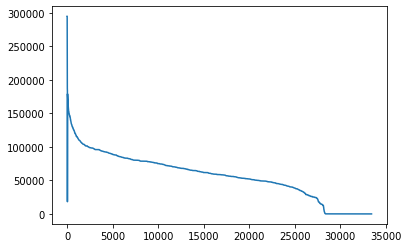

In [134]:
salary = pdf["Salary"].values
x_ax = range(33422)
print(salary.size)
plt.plot(x_ax, salary)
plt.show()